# Data Wrangling: WeRateDogs Twitter Data

In [159]:
#importing required libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import re
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Wrangling

## 1.1 Twitter archive file 

In [2]:
#save twitter-archive-enhanced.csv file in twitter_archive dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 1.2 Image Predictions file

In [5]:
#Downloading and saving image predictions data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

In [7]:
r

<Response [200]>

In [8]:
file_name = url.split('/')[-1]
file_name

'image-predictions.tsv'

In [10]:
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(r.content)

In [3]:
#save image-prediction.tsv file in image_prediction dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 1.3 Twitter API Data for the favourites and retweets counts

In [15]:
consumer_key = '****************************'
consumer_secret = '*************************'
access_token = '****************************'
access_secret = '***************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [17]:
#Experimenting to extract one tweet's id information

exp_tweet = api.get_status(twitter_archive.tweet_id[1000], tweet_mode='extended')
content = exp_tweet._json
content

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [18]:
#added for experimenting new way of getting the data 
exp_tweet.full_text

'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q'

In [26]:
exp_tweet.retweet_count, exp_tweet.id, exp_tweet.favorite_count

(2067, 747963614829678593, 5601)

In [27]:
#checking the keys of the test tweet
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [28]:
#Getting the retweet and favourite counts
content['retweet_count'], content['id'], content['favorite_count']

(2067, 747963614829678593, 5601)

In [29]:
#investigating the user information
content['user'].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [30]:
content['user']['followers_count'], content['user']['location']

(8960334, 'links and things ➜')

### 1.3.1 Quering The Twitter API

In [31]:
#creating a file for the tweets' text data
errors = []
if not os.path.isfile('tweet_json.txt'):
    #create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in twitter_archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode='extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

Rate limit reached. Sleeping for: 330


Error on tweet id 754011816964026368;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 680055455951884288;[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 344


### 1.3.2 Reading the tweet_json.txt

In [4]:
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                        'retweet_count':retweet_count,
                        'favorite_count':fav_count,
                        'user_count':user_count})

In [5]:
api_df = pd.DataFrame(df_list)
api_df.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,7390,35099,8960354
1,892177421306343426,5504,30383,8960354
2,891815181378084864,3637,22845,8960354
3,891689557279858688,7566,38374,8960354
4,891327558926688256,8151,36645,8960354


# 2. Data Assessment

## Visual Assesment

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
api_df

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,7390,35099,8960354
1,892177421306343426,5504,30383,8960354
2,891815181378084864,3637,22845,8960354
3,891689557279858688,7566,38374,8960354
4,891327558926688256,8151,36645,8960354
...,...,...,...,...
2326,666049248165822465,38,94,8960387
2327,666044226329800704,122,260,8960387
2328,666033412701032449,39,107,8960387
2329,666029285002620928,41,116,8960387


## Programmatic Assesment

In [25]:
#Data types of each column and number of entries
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [623]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
print(twitter_archive['doggo'].value_counts())
print(twitter_archive['floofer'].value_counts())
print(twitter_archive['pupper'].value_counts())
print(twitter_archive['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [130]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [205]:
twitter_archive['tweet_id'].loc[twitter_archive['rating_denominator']==2]

2335    666287406224695296
Name: tweet_id, dtype: int64

In [30]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
sum(image_prediction['tweet_id'].duplicated())

0

In [32]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
 3   user_count      2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


### Quality issues
#### `twitter_archive` table
- Missing values in name column and invalid names less than 2 characters.
- By comparing the number of rows in `image_prediction` and `twitter_archive` tables, we found that there are many tweets in `twitter_archive` table has no image. This rows should be dropped.
- Nan values in 'expanded_urls' column, it represnt tweets with no image, should be dropped.
- Some tweets are actually retweets and replies not original tweets that have to be deleted.
- Some columns have represntations of null values as 'None' not 'NaN'
- 'retweeted_stauts_timestamp' and 'timestamp' should be datetime not object.
- Deal with rating_numerator and rating_denominator to make sure it extracted in right way from the text

#### `image_prediction` table
- create 1 column for image prediction and 1 column for confidence level
- drop rewteets and replies from the table

#### `api_df` table
- Keep original tweets only

### Tidiness issues
- values are column names ('doggo','floofer','pupper','puppo') in `twitter_archive` table
- Merge `twittwer_archive` with `api_df` tables
- columns headers are values, not variable names in `image_prediction` table

# 3. Data Cleaning

In [925]:
archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
api_clean = api_df.copy()

## 3.1 'retweeted_status_timestamp' and 'timestamp' should be datatime not object in `twitter_archive` table

### Define
- 'retweeted_stauts_timestamp' and 'timestamp' should be datetime not object.
- we should convert data type of each column from object to datetime 

### Code

In [926]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp'])

### Test

In [927]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## 3.2 Some columns have represntations of null values as 'None' not 'NaN' in `twitter_archive` table

### Define
convert 'None' values with "" as empty string, in the columnns 'doggo','floofer', 'pupper'and 'puppo' in `twitter_archive` table

### Code

In [928]:
archive_clean['doggo'].replace({"None": ""}, inplace=True)
archive_clean['floofer'].replace({"None": ""}, inplace=True)
archive_clean['pupper'].replace({"None": ""}, inplace=True)
archive_clean['puppo'].replace({"None": ""}, inplace=True)

### Test

In [929]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
293,837820167694528512,NaN,NaN,2017-03-04 00:21:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Here's a pupper before and after being asked ""who's a good girl?"" Unsure as h*ck. 12/10 hint hint it's you https://t.co/ORiK6jlgdH",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/837820167694528512/photo/1,https://twitter.com/dog_rates/status/837820167694528512/photo/1",12,10,None,,,pupper,
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2,10,None,,,,
331,832998151111966721,NaN,NaN,2017-02-18 17:00:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Rhino. He arrived at a shelter with an elaborate doggo manual for his new family, written by someone who will always love him. 13/10 https://t.co/QX1h0oqMz0",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/832998151111966721/photo/1,https://twitter.com/dog_rates/status/832998151111966721/photo/1",13,10,Rhino,doggo,,,
743,780459368902959104,NaN,NaN,2016-09-26 17:29:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bear. Don't worry, he's not a real bear tho. Contains unreal amounts of squish. 11/10 heteroskedastic af https://t.co/coi4l1T2Sm",NaN,NaN,NaT,https://twitter.com/dog_rates/status/780459368902959104/photo/1,11,10,Bear,,,,
2250,667832474953625600,NaN,NaN,2015-11-20 22:30:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",THE EYES 12/10\n\nI'm sorry. These are supposed to be funny but your dogs are too adorable https://t.co/z1xPTgVLc7,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667832474953625600/photo/1,12,10,None,,,,


## 3.3 values are column names ('doggo','floofer','pupper','puppo') in `twitter_archive` table

### Define
- concatenate the columns in one column 'dog_breed'
- drop the old columns 
- Replace the empty string to np.nan
- if the value of 'dog_breed' is combined two type, make it readable

### Code

In [930]:
#add columns 'doggo', 'floofer', 'pupper',and 'puppo' to make a new column 'dog_breed' 
old_columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean['dog_breed'] = archive_clean[old_columns].apply(lambda row: "".join(row.values.astype(str)), axis=1)

In [932]:
# drop old columns 'doggo', 'floofer', 'pupper',and 'puppo'
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [934]:
#convert empty strings in 'dog_breed' to "NaN"
archive_clean['dog_breed'].replace({"": np.nan}, inplace=True)

In [936]:
#make inappropriate values more readable
#I will make it manually as it not much data
archive_clean['dog_breed'].replace({"doggopuppo": "doggo-puppo", "doggofloofer": "doggo-floofer", "doggopupper": "doggo-pupper"}, inplace=True)

### Test

In [931]:
#check that all old columns combined successfully in new column 'dog_breed'
archive_clean['dog_breed'].value_counts()

                1976
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggopuppo      1   
doggofloofer    1   
Name: dog_breed, dtype: int64

In [933]:
#make sure old columns deleted
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [935]:
#check all empty strings is converted to 'NaN'
archive_clean['dog_breed'].isnull().sum()

1976

In [937]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [938]:
#check values changed
archive_clean['dog_breed'].value_counts()

pupper           245
doggo            83 
puppo            29 
doggo-pupper     12 
floofer          9  
doggo-puppo      1  
doggo-floofer    1  
Name: dog_breed, dtype: int64

## 3.4 Nan values in 'expanded_urls' column, it represnt tweets with no image, should be dropped in `twitter_archive` table

### Define
- drop any row with 'NaN' value in column 'expanded_urls' with dropna()

### Code

In [939]:
#the number of 'NaN' values
archive_clean.expanded_urls.isnull().sum()

59

In [940]:
#drop all rows have 'NaN' value in 'expanded_urls'
archive_clean.dropna(subset=['expanded_urls'], axis=0, inplace=True)

In [941]:
#to reset the index without any problem
archive_clean.reset_index(drop=True, inplace=True)

### Test

In [942]:
#check if there are any 'NaN' values
archive_clean.expanded_urls.isnull().sum()

0

In [943]:
#check the new number of rows after dropping 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2297 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2297 non-null   datetime64[ns, UTC]
 4   source                      2297 non-null   object             
 5   text                        2297 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2297 non-null   int64           

## 3.5 Some tweets are actually retweets and replies not original tweets that have to be deleted in `twitter_archive` table

### Define
- drop any row has value (not 'NaN') in column 'retweeted_status_id' because it is retweet not original tweet
- drop any row has value (not 'NaN') in column 'in_reply_to_status_id' because it is reply not original tweet
- drop retweets and replies columns as we don't need them anymore

### Code

In [944]:
#get list of 'tweet_id' of replies
replies_tweet_id_list = list(archive_clean[archive_clean['in_reply_to_status_id'].notnull()]['tweet_id'])

#get list of 'tweet_id' of retweets
retweets_tweet_id_list = list(archive_clean[archive_clean['retweeted_status_id'].notnull()]['tweet_id'])

In [945]:
archive_clean.drop(archive_clean[archive_clean['in_reply_to_status_id'].notnull()].index, inplace=True)
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull()].index, inplace=True)

In [946]:
#to reset the index without any problem
archive_clean.reset_index(drop=True, inplace=True)

In [947]:
#drop retweets and replies columns
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [948]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   dog_breed           335 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 147.4+ KB


## 3.6 drop retweets and replies in `image_prediction_clean` table

### Define
- drop and 'tweet_id' that matches 'tweet_id' of replies or retweets

### Code

In [949]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [950]:
#convert 'tweet_id' column in 'image_prediction_clean' table to list
image_tweet_list = list(image_prediction_clean['tweet_id'])

#get the intersection between tweet_id in image and replies
image_reply = list(set(image_tweet_list) & set(replies_tweet_id_list))
print(len(image_reply))
image_reply

23


[856526610513747968,
 844979544864018432,
 863079547188785154,
 746906459439529985,
 746818907684614144,
 802265048156610565,
 729838605770891264,
 705786532653883392,
 704871453724954624,
 703425003149250560,
 695767669421768709,
 692142790915014657,
 684538444857667585,
 684225744407494656,
 694356675654983680,
 674793399141146624,
 674754018082705410,
 674999807681908736,
 675349384339542016,
 675870721063669760,
 669353438988365824,
 675707330206547968,
 671729906628341761]

In [951]:
#drop all replies from 'image_prediction_clean' table
for index, row in image_prediction_clean.iterrows():
    if row['tweet_id'] in image_reply:
        image_prediction_clean.drop(image_prediction_clean[image_prediction_clean['tweet_id'] == row['tweet_id']].index, inplace=True)

In [952]:
#to reset the index without any problem
image_prediction_clean.reset_index(drop=True, inplace=True)

In [953]:
#get the intersection between tweet_id in image and retweets
image_retweet = list(set(image_tweet_list) & set(retweets_tweet_id_list))
print(len(image_retweet))
image_retweet

81


[885311592912609280,
 888202515573088257,
 877611172832227328,
 841833993020538882,
 873697596434513921,
 832215726631055365,
 817181837579653120,
 806242860592926720,
 794355576146903043,
 837012587749474308,
 813944609378369540,
 799774291445383169,
 761371037149827077,
 802624713319034886,
 757729163776290825,
 804413760345620481,
 802247111496568832,
 780496263422808064,
 807059379405148160,
 832040443403784192,
 821813639212650496,
 842892208864923648,
 851953902622658560,
 816829038950027264,
 798673117451325440,
 791026214425268224,
 770093767776997377,
 823269594223824897,
 805958939288408065,
 800443802682937345,
 798628517273620480,
 776819012571455488,
 786036967502913536,
 766078092750233600,
 752309394570878976,
 794983741416415232,
 777641927919427584,
 771171053431250945,
 757597904299253760,
 759159934323924993,
 829878982036299777,
 832769181346996225,
 775898661951791106,
 798644042770751489,
 780476555013349377,
 778396591732486144,
 711998809858043904,
 860924035999

In [954]:
#drop all retweets from 'image_prediction_clean' table
for index, row in image_prediction_clean.iterrows():
    if row['tweet_id'] in image_retweet:
        image_prediction_clean.drop(image_prediction_clean[image_prediction_clean['tweet_id'] == row['tweet_id']].index, inplace=True)

In [955]:
#to reset the index without any problem
image_prediction_clean.reset_index(drop=True, inplace=True)

### Test

In [956]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.5+ KB


## 3.7 By comparing the number of rows in `image_prediction` and `twitter_archive` tables, we found that there are many tweets in `twitter_archive` table has no image. This rows should be dropped.

### Define
- check 'tweet_id' in 'image_prediction' table and 'twitter_archive' table, then drop rows in the 'twitter_archive' that their 'tweet_id' not in 'image_prediction' table

### Code

In [957]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   dog_breed           335 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 147.4+ KB


In [958]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 144.5+ KB


In [959]:
#get column 'tweet_id' in 'archive_clean' and 'image_prediction_clean' tables into list
archive_twet_list = list(archive_clean['tweet_id'])
image_prediction_list = list(image_prediction_clean['tweet_id'])

#get the difference between the tables, to know which original tweets have invalid images
messy_images = list(set(archive_tweet_list) & set(image_prediction_list))
print(len(messy_images))
messy_images

1971


[666051853826850816,
 666049248165822465,
 666094000022159362,
 666373753744588802,
 666055525042405380,
 667090893657276420,
 667878741721415682,
 670046952931721218,
 671115716440031232,
 672594978741354496,
 700002074055016451,
 740365076218183684,
 745712589599014916,
 687818504314159109,
 669567591774625800,
 672984142909456390,
 676821958043033607,
 887473957103951883,
 668643542311546881,
 796080075804475393,
 741303864243200000,
 671789708968640512,
 673708611235921920,
 674042553264685056,
 716802964044845056,
 736225175608430592,
 738537504001953792,
 749317047558017024,
 751538714308972544,
 765222098633691136,
 774314403806253056,
 691820333922455552,
 815736392542261248,
 784431430411685888,
 670840546554966016,
 840268004936019968,
 707610948723478529,
 732732193018155009,
 747963614829678593,
 766313316352462849,
 779123168116150273,
 789137962068021249,
 675531475945709568,
 671855973984772097,
 822872901745569793,
 788908386943430656,
 666644823164719104,
 675362609739

In [960]:
#drop any row that in 'archive_clean' table and not in 'image_prediction_clean' table
for index, row in archive_clean.iterrows():
    if row['tweet_id'] not in messy_images:
        archive_clean.drop(archive_clean[archive_clean['tweet_id'] == row['tweet_id']].index, inplace=True)

In [961]:
#to reset the index without any problem
archive_clean.reset_index(drop=True, inplace=True)

### Test

In [962]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_breed           303 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 138.7+ KB


In [963]:
archive_list = list(archive_clean['tweet_id'])
image_list = list(image_prediction_clean['tweet_id'])
archive_list.sort()
image_list.sort()
if archive_list == image_list:
    print("Matched")

Matched


## 3.8 Missing values in name column and invalid names less than 2 characters in `twitter_archive` table

### Define
- correct names which have value 'a'

### Code

In [964]:
archive_clean.name.value_counts()

None       524
a          55 
Charlie    11 
Oliver     10 
Cooper     10 
           .. 
Bubba      1  
Moreton    1  
Major      1  
Tobi       1  
Gidget     1  
Name: name, Length: 935, dtype: int64

In [965]:
#check the text of name 'a' to make sure that it extracted right or not
text_name_a = list(archive_clean['text'].loc[(archive_clean['name'] == "a")])
text_name_a

['Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF',
 'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq',
 'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn',
 'This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW',
 'Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R',
 'This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2',
 'This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKC

In [966]:
#check the text of name 'an' to make sure that it extracted right or not
text_name_an = list(archive_clean['text'].loc[(archive_clean['name'] == "an")])
text_name_an

["This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt",
 'This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR',
 'This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg',
 'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv',
 "This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc"]

In [967]:
#try to extract some dogs names if found , else will make it None
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():
    try:
        if row['name'] == "a":
            new_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index, 'name'].replace('a', new_name)
        elif row['name'] == "an":
            new_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('an', new_name)
    except IndexError:
        archive_clean.loc[index,'name'] = "None"

### Test

In [968]:
#check all 'a' values are replaced 
archive_clean.query('name == "a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed


In [969]:
#check all 'an' values are replaced
archive_clean.query('name == "an"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed


In [970]:
#check None values are increased 
archive_clean['name'].value_counts()

None       564
Charlie    11 
Lucy       10 
Oliver     10 
Cooper     10 
           .. 
Stewie     1  
Bubba      1  
Moreton    1  
Major      1  
Gidget     1  
Name: name, Length: 951, dtype: int64

### Define
- replace 'None' values with 'NaN' with np.nan

### Code

In [971]:
#replace "None" values with 'NaN'
archive_clean['name'].replace({"None": np.nan}, inplace=True)

### Test

In [972]:
#check that 640 "None" values are converted to "NaN"
archive_clean['name'].isnull().sum()

564

## 3.9 Keep original tweets only in `api_clean` table

### Define
- delete any row its 'tweet_id' not found in 'tweet_id' column in 'archive_clean' table

### Code

In [973]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
 3   user_count      2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [974]:
#get column 'tweet_id' in 'archive_clean' and 'api_df' tables into list
archive_list = list(archive_clean['tweet_id'])
api_list = list(api_clean['tweet_id'])

#get the intersection between the tables
out_list = list(set(api_list) & set(archive_list))
print(len(out_list))
out_list

1964


[891815181378084864,
 892420643555336193,
 890971913173991426,
 891689557279858688,
 891327558926688256,
 890729181411237888,
 890609185150312448,
 890006608113172480,
 861005113778896900,
 834931633769889797,
 823322678127919110,
 887473957103951883,
 883838122936631299,
 831939777352105988,
 786233965241827333,
 778748913645780993,
 676821958043033607,
 670046952931721218,
 846042936437604353,
 741303864243200000,
 674042553264685056,
 801285448605831168,
 801115127852503040,
 749317047558017024,
 691820333922455552,
 784431430411685888,
 771014301343748096,
 815736392542261248,
 813157409116065792,
 751538714308972544,
 711306686208872448,
 670840546554966016,
 747963614829678593,
 732732193018155009,
 836753516572119041,
 835574547218894849,
 707610948723478529,
 788908386943430656,
 735648611367784448,
 701601587219795968,
 675362609739206656,
 666644823164719104,
 829449946868879360,
 828708714936930305,
 667937095915278337,
 824663926340194305,
 830097400375152640,
 666033412701

In [975]:
#drop any row that in 'archive_clean' table and not in 'api_clean' table
for index, row in api_clean.iterrows():
    if row['tweet_id'] not in out_list:
        api_clean.drop(api_clean[api_clean['tweet_id'] == row['tweet_id']].index, inplace=True)

In [976]:
#to reset the index without any problem
api_clean.reset_index(drop=True, inplace=True)

### Test

In [977]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1964 non-null   int64
 1   retweet_count   1964 non-null   int64
 2   favorite_count  1964 non-null   int64
 3   user_count      1964 non-null   int64
dtypes: int64(4)
memory usage: 61.5 KB


In [978]:
#check that all 'tweet_id' column in 'api_clean' table are in 'tweet_id' column in 'archive_clean' table
api_list = list(api_clean['tweet_id'])
print(len(list(set(archive_list) - set(api_list))))
flag = 0
if(set(api_list).issubset(set(archive_list))): 
    flag = 1
if(flag):
    print("Done")
else:
    print("something went wrong!")

7
Done


## 3.10 Deal with rating_numerator and rating_denominator to make sure it extracted in right way from the text in `twitter_archive` table

### Define
- slice the records to investigate the right value of denominators that below or above 10

### Code

In [980]:
archive_clean['rating_denominator'].value_counts()

10     1954
50     3   
80     2   
11     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

In [981]:
archive_clean['rating_denominator'].loc[archive_clean['rating_denominator'] == 2] = 10

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [985]:
archive_clean['rating_denominator'].loc[archive_clean['rating_denominator'] < 10] = 10

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [986]:
pd.set_option('display.max_colwidth', 0)
archive_clean.loc[archive_clean['rating_denominator'] > 10]['text']

320     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
658     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                    
794     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ      
842     Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                         
884     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                  
918     This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                             
939     Happy Saturday here's 9 puppers on a bench. 99/90 good work ev

In [987]:
archive_clean['rating_denominator'].loc[archive_clean['rating_denominator'] == 11] = 10

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [988]:
#count number of dogs in the picture related to denominator values above 10
dogs_count = archive_clean.rating_denominator[archive_clean['rating_denominator'] > 10] /10
dogs_count

320     7.0 
658     15.0
842     17.0
884     2.0 
918     5.0 
939     9.0 
963     8.0 
981     5.0 
1045    5.0 
1120    4.0 
1288    11.0
1420    12.0
1478    8.0 
Name: rating_denominator, dtype: float64

In [989]:
archive_clean.duplicated().sum()

0

In [990]:
# replace denominators with new values based on dog_count
archive_clean.loc[archive_clean.rating_denominator > 10, ['rating_numerator', 'rating_denominator']] = [archive_clean.rating_numerator[archive_clean.rating_denominator > 10]/dogs_count , 10]

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### Test

In [991]:
archive_clean['rating_denominator'].value_counts()

10    1971
Name: rating_denominator, dtype: int64

### Define
- slice the records to investigate the right value of numerator that below 6 and above 15

### Code

In [993]:
archive_clean.rating_numerator.value_counts()

12.0      450
10.0      419
11.0      397
13.0      253
9.0       151
8.0       95 
7.0       52 
14.0      33 
5.0       33 
6.0       32 
3.0       19 
4.0       15 
2.0       10 
1.0       5  
27.0      1  
24.0      1  
0.0       1  
1776.0    1  
26.0      1  
75.0      1  
420.0     1  
Name: rating_numerator, dtype: int64

In [994]:
pd.set_option('display.max_colwidth', 0)
archive_clean.loc[archive_clean['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
382,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,10,Sam,NaN
499,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10,Logan,NaN
549,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10,Sophie,pupper
722,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,NaN
1359,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10,NaN,NaN
1696,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10,NaN,NaN


In [995]:
#fix the proble of numerators above 15 manually
archive_clean['rating_numerator'].loc[archive_clean['rating_numerator'] == 75] = 5
archive_clean['rating_numerator'].loc[archive_clean['rating_numerator'] == 27] = 11

# in the original image (it's link in the end of the text) the face of dog was cropped
archive_clean['rating_numerator'].loc[archive_clean['rating_numerator'] == 1776] = 15
archive_clean['rating_numerator'].loc[archive_clean['rating_numerator'] == 26] = 11

#in the image is snoop dogg not a real dog
archive_clean['rating_numerator'].loc[archive_clean['rating_numerator'] == 420] = 0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [996]:
#show the numerators less than 6
archive_clean.loc[archive_clean['rating_numerator'] < 6]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
39,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10,Bella,NaN
232,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10,NaN,NaN
499,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,5.0,10,Logan,NaN
526,781661882474196992,2016-09-30 01:08:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5.0,10,NaN,NaN
550,777885040357281792,2016-09-19 15:00:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10,Wesley,NaN
...,...,...,...,...,...,...,...,...,...
1949,666293911632134144,2015-11-16 16:37:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3.0,10,NaN,NaN
1950,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,10,NaN,NaN
1953,666104133288665088,2015-11-16 04:02:55+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1.0,10,NaN,NaN
1964,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.0,10,NaN,NaN


In [997]:
#extract most of numerator values from text
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
archive_clean['rating_numerator'] = archive_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

### Test

In [998]:
archive_clean.rating_numerator.value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00       95 
7.00       52 
14.00      33 
6.00       32 
5.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
60.00      1  
24.00      1  
99.00      1  
1776.00    1  
13.50      1  
11.27      1  
165.00     1  
11.26      1  
0.00       1  
84.00      1  
9.75       1  
45.00      1  
88.00      1  
144.00     1  
44.00      1  
121.00     1  
204.00     1  
50.00      1  
80.00      1  
420.00     1  
Name: rating_numerator, dtype: int64

## 3.11 columns headers are values, not variable names in `image_prediction` table

### Define
- create 1 column for image-prediction and 1 column for confidence

### Code

In [1000]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1001]:
# Rename the dataset columns to avoid confusion
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_prediction_clean.columns = cols

# Reshape the dataframe
image_prediction_clean = pd.wide_to_long(image_prediction_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

### Test

In [1002]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [1003]:
image_prediction_clean.duplicated().sum()

0

## 3.12 Merging `archive_clean` with `api_clean`

### Define
- merging tables with merge() function

### Code

In [1004]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   int64              
 7   name                1407 non-null   object             
 8   dog_breed           303 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 138.7+ KB


In [1005]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1964 non-null   int64
 1   retweet_count   1964 non-null   int64
 2   favorite_count  1964 non-null   int64
 3   user_count      1964 non-null   int64
dtypes: int64(4)
memory usage: 61.5 KB


In [1010]:
#these tweet_id in 'archive_clean' and not in 'api_clean'
archive_list = list(archive_clean['tweet_id'])
api_list = list(api_clean['tweet_id'])
diff = list(set(archive_list) - set(api_list))
print(len(diff))
diff

7


[680055455951884288,
 779123168116150273,
 829374341691346946,
 837366284874571778,
 872261713294495745,
 844704788403113984,
 754011816964026368]

In [1007]:
#merge two tables with left merge to take all original tweets from 'archive_clean' table
df_combined = archive_clean.merge(api_df, left_on="tweet_id", right_on="tweet_id", how="left")
df_combined

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,user_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,7390.0,35099.0,8960354.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,5504.0,30383.0,8960354.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,3637.0,22845.0,8960354.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,7566.0,38374.0,8960354.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,8151.0,36645.0,8960354.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,NaN,NaN,38.0,94.0,8960387.0
1967,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,NaN,NaN,122.0,260.0,8960387.0
1968,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,NaN,39.0,107.0,8960387.0
1969,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,NaN,NaN,41.0,116.0,8960387.0


### Test

In [1014]:
#make sure that the tweet_id not in 'api_clean' has NaN values on retweet, favorite, and user count columns
df_combined.query('tweet_id == 779123168116150273')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favorite_count,user_count
539,779123168116150273,2016-09-23 01:00:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Reggie. He hugs everyone he meets. 12/10 keep spreading the love Reggie https://t.co/uMfhduaate,https://twitter.com/dog_rates/status/779123168116150273/photo/1,12.0,10,Reggie,NaN,NaN,NaN,NaN


In [1015]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   int64              
 7   name                1407 non-null   object             
 8   dog_breed           303 non-null    object             
 9   retweet_count       1964 non-null   float64            
 10  favorite_count      1964 non-null   float64            
 11  user_count          1964 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

# 4. Storing the Data

In [1016]:
#store combined 'archive_clean' and 'api_clean' in 'twitter_archive_master.csv'
df_combined.to_csv('twitter_archive_master.csv', index=False)

In [1017]:
#store 'image_prediction' table in another file
image_prediction_clean.to_csv('image_prediction_cleaned.csv', index=False)

# 5. Analyze and Visualize

## 5.1 The relation betweetn retweets and favorite

In [1033]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   int64              
 7   name                1407 non-null   object             
 8   dog_breed           303 non-null    object             
 9   retweet_count       1964 non-null   float64            
 10  favorite_count      1964 non-null   float64            
 11  user_count          1964 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

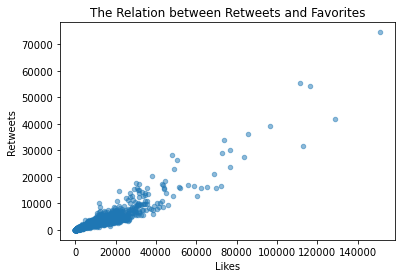

In [1060]:
color = ['#eff3ff', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#084594']
df_combined.plot(kind="scatter", x="favorite_count", y="retweet_count", alpha=0.5)
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.title("The Relation between Retweets and Favorites");
plt.savefig('Retweets_with_Likes.png', bbox_inches='tight')

- Retweets are positively correlated with favorites

## 5.2 The most popular dog breed

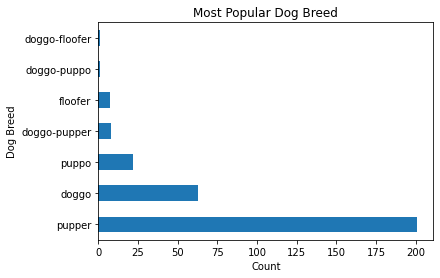

In [1068]:
df_combined['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Popular Dog Breed')
plt.xlabel('Count')
plt.ylabel('Dog Breed');
plt.savefig('most_popular_dog.png', bbox_inches='tight')

- Pupper is the most popular dog breed

## 5.3 which are the top 10 predicted dog breed 

In [1079]:
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [1084]:
predicted = image_prediction_clean[image_prediction_clean['breed'] == True]
highest_predicted = predicted.groupby(['prediction']).mean()['confidence']
highest_predicted.sort_values(ascending=False).head(10)

prediction
Bernese_mountain_dog     0.651259
komondor                 0.522381
Samoyed                  0.513834
Pembroke                 0.495139
pug                      0.476665
Blenheim_spaniel         0.475460
golden_retriever         0.443006
dalmatian                0.400302
German_shepherd          0.369846
flat-coated_retriever    0.361089
Name: confidence, dtype: float64

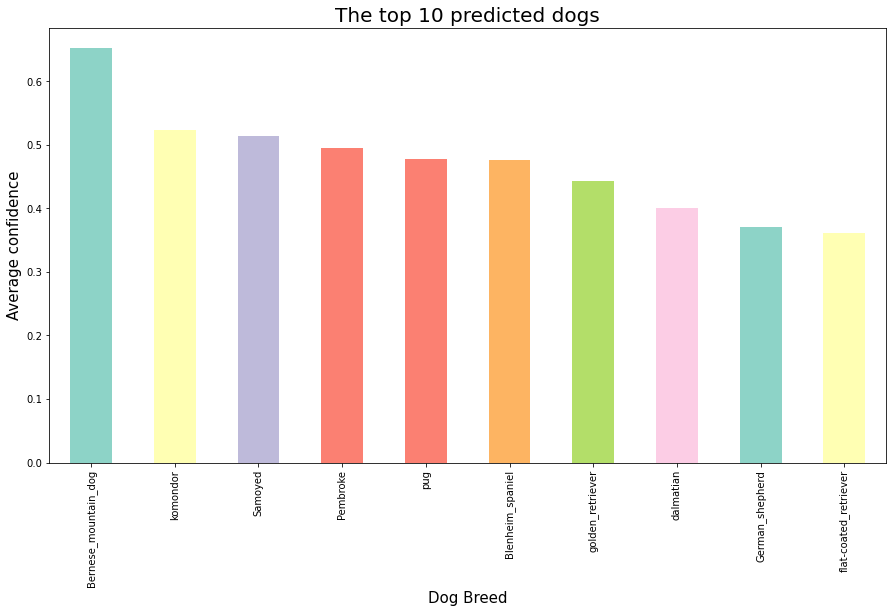

In [1099]:
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#fb8072', '#fdb462', '#b3de69', '#fccde5']
highest_predicted.sort_values(ascending=False).head(10).plot(kind="bar", color= colors, figsize=(15,8))
plt.ylabel("Average confidence", size=15)
plt.xlabel("Dog Breed", size=15)
plt.title("The top 10 predicted dogs", size=20);
plt.savefig('top_10_predicted_dogs.png', bbox_inches='tight')

- The highest average confidence level in predicting the dog breed is the Bernese Mountain Dog. The second is the Komondor. Both breeds have a unique appearance, which probably made the prediction easier. The highest confidence level is 65% on average. In my opinion, this level is too low and for deeper analysis we should use another algorithm to be more accurate.

## 5.4 How changed the Retweet and Favorite Count over time?

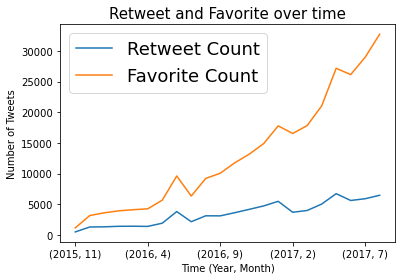

In [1110]:
df_combined.retweet_count.groupby([df_combined['timestamp'].dt.year, df_combined['timestamp'].dt.month]).mean().plot(kind='line')
df_combined.favorite_count.groupby([df_combined['timestamp'].dt.year, df_combined['timestamp'].dt.month]).mean().plot(kind='line')
plt.title('Retweet and Favorite over time', size =15)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year, Month)')
plt.legend(('Retweet Count', 'Favorite Count'), fontsize=18);
plt.savefig('retweet_and_favorite_overtime');

- number of retweets and favorites increased overtime

## 5.5 How many dogs are rated above 10 ?

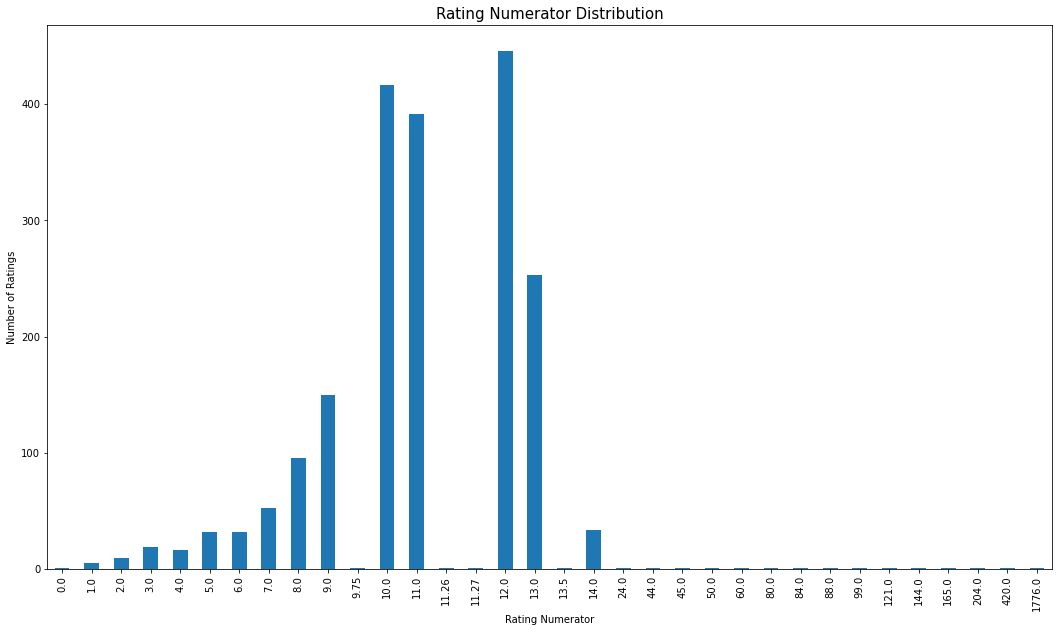

In [1118]:
df_combined['rating_numerator'].value_counts().sort_index().plot(kind='bar', figsize=(18,10))
plt.title ('Rating Numerator Distribution', size=15)
plt.xlabel('Rating Numerator')
plt.ylabel('Number of Ratings');
plt.savefig('rating_numerator_distribution');

- the most often assigned numerator is 12